In [6]:
import scipy
import seaborn as sns 
from matplotlib import pyplot as plt

class IsingSimulation:
    J = 6.34369e-21  
    k_B = 1.38065e-23 
    
    def __init__(self, size, temperature=300):
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def temperature(self, temp):
        self.temperature = float(temp)

    def energy(self):
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +scipy.roll(self.state, 1, axis=1))).sum()

    def magnetism(self):
        return self.state.mean()

    def update(self):
        i, j = scipy.random.randint(self.size, size=2)
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] + self.state[(i - 1) % self.size, j] +self.state[i, (j + 1) % self.size] + self.state[i, (j - 1) % self.size])
        log_p = -delta_E / (self.temperature * self.k_B)
        
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]
        self.step += 1

    def display(self):
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.magnetism()))

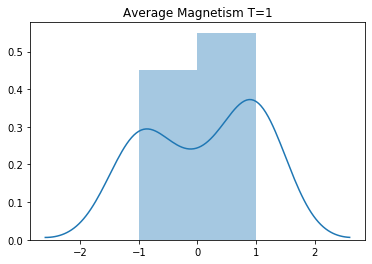

In [7]:
size = 20
avg_mag = []
for _ in range(20):
    sim = IsingSimulation(size, temperature=1)
    for _ in range(199899):
        sim.update()
    avg_mag.append(sim.magnetism())

sns.distplot(avg_mag)
plt.title("Average Magnetism T=1")
plt.show()

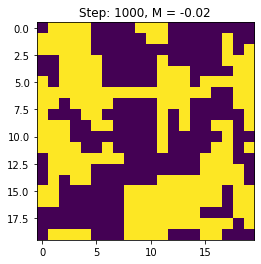

In [8]:
size = 20
sim = IsingSimulation(size, temperature=1043)  # Ising model at the Curie temperature
for _ in range(1000):
    sim.update()
sim.display()